In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier


In [2]:
df = pd.read_csv("data/clean_IMDB.csv")
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})


In [3]:
X = df['cleaned_reviews']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Import the TF-IDF Vectorizer from sklearn's feature extraction module
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')  


X_train_tfidf = vectorizer.fit_transform(X_train)


X_test_tfidf = vectorizer.transform(X_test)


In [5]:
model = DecisionTreeClassifier(random_state=1)

model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

In [6]:
y_pred = model.predict(X_test_tfidf)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n\n\n")



print(classification_report(y_test, y_pred))

Accuracy: 0.7336



              precision    recall  f1-score   support

           0       0.73      0.74      0.73      4961
           1       0.74      0.73      0.73      5039

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



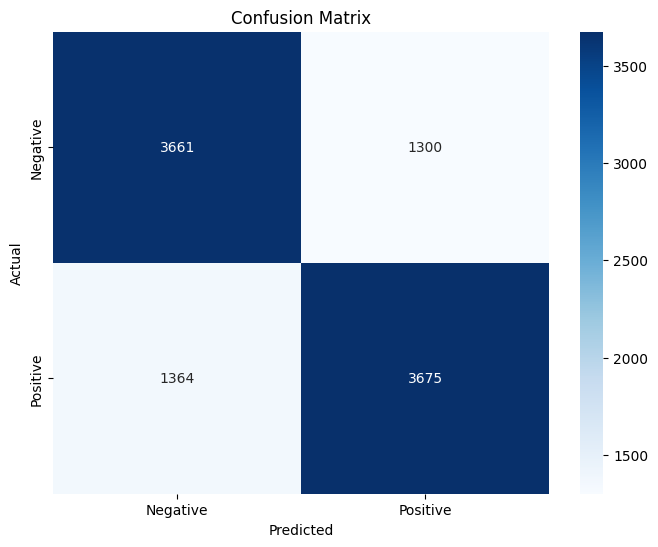

In [7]:

from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


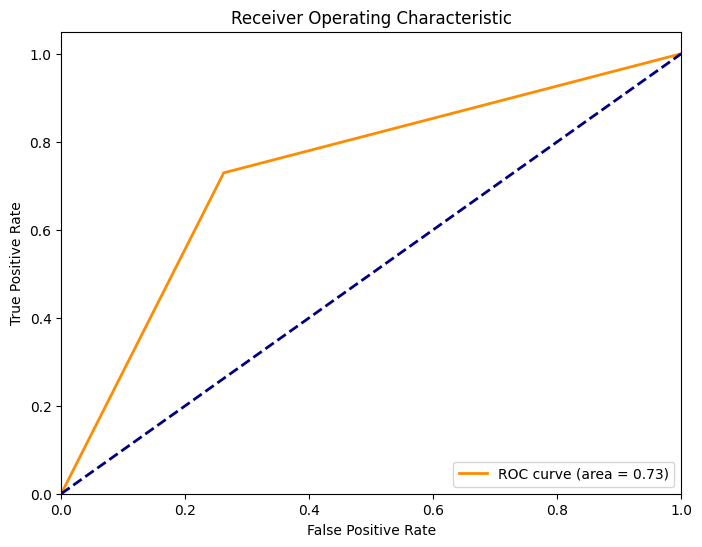

In [8]:
from sklearn.metrics import roc_curve, auc

# Get probabilities for the positive class
y_probs = model.predict_proba(X_test_tfidf)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [9]:
from sklearn.metrics import accuracy_score

def get_accuracy(max_leaf_nodes, X_train, X_test, y_train, y_test):
    # Define and fit the model with specified max_leaf_nodes
    model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)

    # Make predictions on the validation set
    preds_val = model.predict(X_test)

    # Calculate Accuracy
    accuracy = accuracy_score(y_test, preds_val)
    
    return accuracy

In [10]:
# List of max_leaf_nodes to test
leaf_node_options = [5, 10, 20, 50, 100, 200]
highest_accuracy = 0  # Initialize to a low value
best_node = None  # Initialize best_node


In [11]:
# Compare accuracy with differing values of max_leaf_nodes
for max_leaf_nodes in leaf_node_options:
    # Get the accuracy for the current max_leaf_nodes value
    my_accuracy = get_accuracy(max_leaf_nodes, X_train_tfidf, X_test_tfidf, y_train, y_test)

    # Print the results in a formatted string
    print(f"Max leaf nodes: {max_leaf_nodes} \t Accuracy: {my_accuracy:.2f}")
    
    # Update the best node if current accuracy is higher
    if my_accuracy > highest_accuracy:
        highest_accuracy = my_accuracy
        best_node = max_leaf_nodes

print(f"The best number of leaf nodes is {best_node} with an accuracy of {highest_accuracy:.2f}")

Max leaf nodes: 5 	 Accuracy: 0.67
Max leaf nodes: 10 	 Accuracy: 0.72
Max leaf nodes: 20 	 Accuracy: 0.74
Max leaf nodes: 50 	 Accuracy: 0.76
Max leaf nodes: 100 	 Accuracy: 0.77
Max leaf nodes: 200 	 Accuracy: 0.77
The best number of leaf nodes is 200 with an accuracy of 0.77


In [12]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest Classifier
forest_model = RandomForestClassifier(random_state=1)

# Train the model with the training data
forest_model.fit(X_train_tfidf, y_train)

# Calculate predictions on the test set
forest_preds = forest_model.predict(X_test_tfidf)

# Calculate accuracy
forest_accuracy = accuracy_score(y_test, forest_preds)

# Print the accuracy
print(f"Random Forest Classifier Accuracy: {forest_accuracy:.2f}")

Random Forest Classifier Accuracy: 0.85


In [13]:
y_pred = forest_model.predict(X_test_tfidf)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n\n\n")



print(classification_report(y_test, y_pred))

Accuracy: 0.8489



              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4961
           1       0.86      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



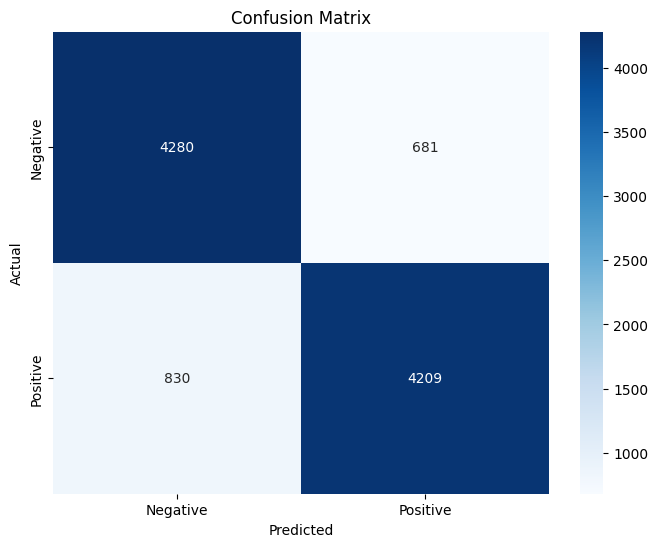

In [14]:

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
